# Step 1: Reading and Understanding the Data

Read the csv and import numpy and pandas libraries

In [1]:
#Ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
car_price = pd.read_csv("CarPrice_Assignment.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Step 2 : Data Preparation


## 1. Cleaning and transforming
#### Extract data from existing column to create new data and clean the new variable data

In [3]:
# Creating column companyname from CarName by taking the brand name from car models

car_price['companyname'] = car_price['CarName'].apply(lambda x : str(x).split(' ')[0])
car_price.drop(['CarName'], axis = 1, inplace = True)
car_price.drop(['car_ID'], axis = 1, inplace = True)


In [4]:
# Data Cleaning and transformation for 'companyname' column

car_price['companyname'].unique()
replaceValues = dict.fromkeys(['vokswagen','volkswagen','vw'], 'volkswagen')    
car_price['companyname'] = car_price['companyname'].replace(replaceValues)
car_price['companyname'].unique()

replaceValues = dict.fromkeys(['porsche','porcshce'], 'porsche')    
car_price['companyname'] = car_price['companyname'].replace(replaceValues)
car_price['companyname'].unique()

replaceValues = dict.fromkeys(['toyota','toyouta'], 'toyota')    
car_price['companyname'] = car_price['companyname'].replace(replaceValues)
car_price['companyname'].unique()

replaceValues = dict.fromkeys(['nissan','Nissan'], 'nissan')    
car_price['companyname'] = car_price['companyname'].replace(replaceValues)
car_price['companyname'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype=object)

In [5]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg    

## 2. Create Dummies for all categorical columns

In [6]:
# Make dummy variables for the categorical variables of dataframe so that the values are numeric as 0 or 1
# IF column has n categorical distinct values then (n-1) dummy varibales are created for that column

car_price_categorical = car_price[['fueltype', 'aspiration', 'doornumber','enginelocation', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'companyname']]
car_price_dummies = pd.get_dummies(car_price_categorical, columns = ['fueltype', 'aspiration', 'doornumber','enginelocation', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'companyname'], drop_first = True)


In [7]:
car_price_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 51 columns):
fueltype_gas              205 non-null uint8
aspiration_turbo          205 non-null uint8
doornumber_two            205 non-null uint8
enginelocation_rear       205 non-null uint8
carbody_hardtop           205 non-null uint8
carbody_hatchback         205 non-null uint8
carbody_sedan             205 non-null uint8
carbody_wagon             205 non-null uint8
drivewheel_fwd            205 non-null uint8
drivewheel_rwd            205 non-null uint8
enginetype_dohcv          205 non-null uint8
enginetype_l              205 non-null uint8
enginetype_ohc            205 non-null uint8
enginetype_ohcf           205 non-null uint8
enginetype_ohcv           205 non-null uint8
enginetype_rotor          205 non-null uint8
cylindernumber_five       205 non-null uint8
cylindernumber_four       205 non-null uint8
cylindernumber_six        205 non-null uint8
cylindernumber_three      205 non-null u

In [8]:
car_price = pd.concat([car_price, car_price_dummies], axis = 1)

In [9]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 76 columns):
symboling                 205 non-null int64
fueltype                  205 non-null object
aspiration                205 non-null object
doornumber                205 non-null object
carbody                   205 non-null object
drivewheel                205 non-null object
enginelocation            205 non-null object
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
enginetype                205 non-null object
cylindernumber            205 non-null object
enginesize                205 non-null int64
fuelsystem                205 non-null object
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower       

In [10]:
# Drop the columns for which dummies are created as the dummies represent the columns now

car_price.drop(['fueltype', 'aspiration', 'doornumber','enginelocation', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'companyname'], axis = 1, inplace = True)

In [11]:
car_price.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,companyname_nissan,companyname_peugeot,companyname_plymouth,companyname_porsche,companyname_renault,companyname_saab,companyname_subaru,companyname_toyota,companyname_volkswagen,companyname_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


## 3. Splittig the prepared data into test and train set

In [12]:
from sklearn.model_selection import train_test_split

# Test data in around 25 % of the total dataframe so we can specify percentage as below depending on size of dataframe
# The small is the dataframe the less is the percentage of data taken as test data

car_price_train, car_price_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)


## 4. Scaling the numeric features except the dummies

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Scaler for applying on features
scaler = MinMaxScaler()


# Selecting the columns which are to be scaled
vars_to_scale = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

# Apply scaler to the dataframe on selected features
car_price_train[vars_to_scale] = scaler.fit_transform(car_price_train[vars_to_scale])
car_price_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,companyname_nissan,companyname_peugeot,companyname_plymouth,companyname_porsche,companyname_renault,companyname_saab,companyname_subaru,companyname_toyota,companyname_volkswagen,companyname_volvo
122,0.6,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,...,0,0,1,0,0,0,0,0,0,0
125,1.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,...,0,0,0,1,0,0,0,0,0,0
166,0.6,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,...,0,0,0,0,0,0,0,0,0,0
199,0.2,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,...,0,0,0,0,0,0,0,0,0,1


## 5. Separate out the x train features and y train feature

In [14]:
# y_train is the dependant variable, here price is what we need to predict
# X_train is the set of independant variables 

y_train = car_price_train.pop('price')
x_train = car_price_train

# Step 3 : Model Building 

### LinearRegression from sklearn is used for model building and RFE is used for feature selection

## 1. RFE - Recursive Feature Selection

In [15]:
# importing RFE and Model from sklearn

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [16]:
# Fit the y_train and x_train in our new model
reg_model = LinearRegression()
#reg_model.fit(x_train, y_train)

# Use RFE feature selection technique to select 20 most important features from all independant variables
rfe = RFE(reg_model, 20)
rfe = rfe.fit(x_train, y_train)

In [17]:
# Get the list of features selected by RFE based on the support as True or False and their ranking
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 33),
 ('wheelbase', False, 7),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('carheight', False, 8),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 15),
 ('horsepower', False, 5),
 ('peakrpm', False, 6),
 ('citympg', False, 29),
 ('highwaympg', False, 16),
 ('fueltype_gas', False, 14),
 ('aspiration_turbo', False, 4),
 ('doornumber_two', False, 38),
 ('enginelocation_rear', True, 1),
 ('carbody_hardtop', False, 21),
 ('carbody_hatchback', False, 20),
 ('carbody_sedan', False, 22),
 ('carbody_wagon', False, 23),
 ('drivewheel_fwd', False, 41),
 ('drivewheel_rwd', False, 31),
 ('enginetype_dohcv', False, 2),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 43),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 30),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 18),
 ('cylindernum

In [18]:
# Get the feature names which are in support of the y_train
support_cols = x_train.columns[rfe.support_]
support_cols

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'companyname_bmw', 'companyname_peugeot', 'companyname_porsche',
       'companyname_saab', 'companyname_subaru', 'companyname_volvo'],
      dtype='object')

In [19]:
# Get the feature names which are not in support of the y_train
x_train.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'companyname_audi', 'companyname_buick', 'companyname_chevrolet',
       'companyname_dodge', 'companyname_honda', 'companyname_isuzu',
       'companyname_jaguar', 'companyname_maxda', 'companyname_mazda',
       'companyname_mercury', 'companyname_mitsubishi', 'companyname_nissan',
       'companyname_plymouth', 'companyname_renault', 'companyname_toyota',
       'companyname_volkswagen'],
      dtype='object')

In [20]:
# Taking only those features in the x_train which are in rfe support
x_train = x_train[support_cols]

In [21]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 20 columns):
carwidth                 143 non-null float64
curbweight               143 non-null float64
enginesize               143 non-null float64
boreratio                143 non-null float64
stroke                   143 non-null float64
enginelocation_rear      143 non-null uint8
enginetype_l             143 non-null uint8
enginetype_ohcf          143 non-null uint8
enginetype_rotor         143 non-null uint8
cylindernumber_five      143 non-null uint8
cylindernumber_four      143 non-null uint8
cylindernumber_three     143 non-null uint8
cylindernumber_twelve    143 non-null uint8
cylindernumber_two       143 non-null uint8
companyname_bmw          143 non-null uint8
companyname_peugeot      143 non-null uint8
companyname_porsche      143 non-null uint8
companyname_saab         143 non-null uint8
companyname_subaru       143 non-null uint8
companyname_volvo        143 non-null uint8
dtype

## 2. Building a Stats Model for analysing our current x_train selected features

In [22]:
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
# Building stats model and calculating VIF for the train set

# Stats model for train set
x_train_lm = sm.add_constant(x_train)
lm = sm.OLS(y_train,x_train_lm).fit()
print(lm.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           6.19e-71
Time:                        09:31:39   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

,Features,VIF
13,cylindernumber_two,inf
5,enginelocation_rear,inf
6,enginetype_l,inf
7,enginetype_ohcf,inf
8,enginetype_rotor,inf
18,companyname_subaru,inf
11,cylindernumber_three,inf
15,companyname_peugeot,inf
2,enginesize,102.740000
1,curbweight,59.180000


In [24]:
# Stats model for train set - Iteration 1

# Drop feature based on higher VIF value P value
x_train_1 = x_train.drop(['enginelocation_rear'], axis=1)

# Build the model
x_train_lm_1 = sm.add_constant(x_train_1)
lm_1 = sm.OLS(y_train,x_train_lm_1).fit()
print(lm_1.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           6.19e-71
Time:                        09:31:39   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

,Features,VIF
10,cylindernumber_three,inf
5,enginetype_l,inf
14,companyname_peugeot,inf
7,enginetype_rotor,inf
12,cylindernumber_two,inf
2,enginesize,102.740000
1,curbweight,59.180000
3,boreratio,53.000000
0,carwidth,46.350000
4,stroke,34.650000


In [25]:
# Stats model for train set - Iteration 2 

# Drop feature based on higher VIF value P value
x_train_2 = x_train_1.drop(['cylindernumber_three'], axis=1)

# ReBuild the model 
x_train_lm_2 = sm.add_constant(x_train_2)
lm_2 = sm.OLS(y_train,x_train_lm_2).fit()
print(lm_2.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           6.19e-71
Time:                        09:31:39   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

,Features,VIF
7,enginetype_rotor,inf
11,cylindernumber_two,inf
2,enginesize,102.740000
1,curbweight,59.180000
3,boreratio,53.000000
0,carwidth,46.350000
4,stroke,34.650000
9,cylindernumber_four,26.610000
16,companyname_subaru,25.290000
6,enginetype_ohcf,21.640000


In [26]:
# Stats model for train set - Iteration 3 

# Drop feature based on higher VIF value P value
x_train_3 = x_train_2.drop(['cylindernumber_two'], axis=1)

# Rebuild the model
x_train_lm_3 = sm.add_constant(x_train_3)
lm_3 = sm.OLS(y_train,x_train_lm_3).fit()
print(lm_3.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           6.19e-71
Time:                        09:31:40   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

,Features,VIF
2,enginesize,102.74
1,curbweight,59.18
3,boreratio,53.00
0,carwidth,46.35
4,stroke,34.65
9,cylindernumber_four,26.61
15,companyname_subaru,25.29
6,enginetype_ohcf,21.64
12,companyname_peugeot,12.12
5,enginetype_l,11.17


In [27]:
# Stats model for train set - Iteration 4 

# Drop feature based on higher VIF value P value
x_train_4 = x_train_3.drop(['curbweight'], axis=1)

# Rebuild the model
x_train_lm_4 = sm.add_constant(x_train_4)
lm_4 = sm.OLS(y_train,x_train_lm_4).fit()
print(lm_3.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           6.19e-71
Time:                        09:31:40   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

,Features,VIF
1,enginesize,72.31
2,boreratio,53.00
0,carwidth,41.86
3,stroke,34.23
8,cylindernumber_four,26.33
14,companyname_subaru,25.17
5,enginetype_ohcf,21.51
11,companyname_peugeot,11.79
4,enginetype_l,11.15
6,enginetype_rotor,4.41


In [28]:
# Stats model for train set - Iteration 5 

# Drop feature based on higher VIF value P value
x_train_5 = x_train_4.drop(['boreratio'], axis=1)

# Rebuild the model
x_train_lm_5 = sm.add_constant(x_train_5)
lm_5 = sm.OLS(y_train,x_train_lm_5).fit()
print(lm_5.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     95.52
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.60e-61
Time:                        09:31:40   Log-Likelihood:                 196.28
No. Observations:                 143   AIC:                            -360.6
Df Residuals:                     127   BIC:                            -313.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

,Features,VIF
0,carwidth,40.79
1,enginesize,29.86
2,stroke,29.29
13,companyname_subaru,22.29
4,enginetype_ohcf,20.88
7,cylindernumber_four,11.79
10,companyname_peugeot,11.61
3,enginetype_l,10.07
6,cylindernumber_five,2.42
5,enginetype_rotor,2.11


In [29]:
# Stats model for train set - Iteration 6 

# Drop feature based on higher VIF value P value
x_train_6 = x_train_5.drop(['carwidth'], axis=1)

# Rebuild the model
x_train_lm_6 = sm.add_constant(x_train_6)
lm_6 = sm.OLS(y_train,x_train_lm_6).fit()
print(lm_6.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     84.01
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           2.16e-57
Time:                        09:31:40   Log-Likelihood:                 182.92
No. Observations:                 143   AIC:                            -335.8
Df Residuals:                     128   BIC:                            -291.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

,Features,VIF
1,stroke,28.38
12,companyname_subaru,18.72
3,enginetype_ohcf,18.09
0,enginesize,13.91
9,companyname_peugeot,11.04
6,cylindernumber_four,10.63
2,enginetype_l,10.03
7,cylindernumber_twelve,1.79
10,companyname_porsche,1.72
4,enginetype_rotor,1.60


In [30]:
# Stats model for train set - Iteration 7 

# Drop feature based on higher VIF value P value
x_train_7 = x_train_6.drop(['stroke'], axis=1)

#Rebuild the model
x_train_lm_7 = sm.add_constant(x_train_7)
lm_7 = sm.OLS(y_train,x_train_lm_7).fit()
print(lm_7.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     86.32
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           5.13e-57
Time:                        09:31:40   Log-Likelihood:                 179.40
No. Observations:                 143   AIC:                            -330.8
Df Residuals:                     129   BIC:                            -289.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.14

,Features,VIF
2,enginetype_ohcf,18.09
11,companyname_subaru,17.85
8,companyname_peugeot,9.13
1,enginetype_l,9.00
0,enginesize,2.73
5,cylindernumber_four,1.92
9,companyname_porsche,1.60
4,cylindernumber_five,1.24
6,cylindernumber_twelve,1.23
7,companyname_bmw,1.21


In [31]:
# Stats model for train set - Iteration 8 

# Drop feature based on higher VIF value P value
x_train_8 = x_train_7.drop(['companyname_subaru'], axis=1)

#Rebuild the model
x_train_lm_8 = sm.add_constant(x_train_8)
lm_8 = sm.OLS(y_train,x_train_lm_8).fit()
print(lm_8.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     92.29
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           1.73e-57
Time:                        09:31:40   Log-Likelihood:                 178.06
No. Observations:                 143   AIC:                            -330.1
Df Residuals:                     130   BIC:                            -291.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.13

,Features,VIF
8,companyname_peugeot,9.13
1,enginetype_l,9.00
0,enginesize,2.72
5,cylindernumber_four,1.88
4,cylindernumber_five,1.24
6,cylindernumber_twelve,1.23
7,companyname_bmw,1.21
2,enginetype_ohcf,1.15
9,companyname_porsche,1.14
11,companyname_volvo,1.10


In [32]:
# Stats model for train set - Iteration 9 

# Drop feature based on higher VIF value P value
x_train_9 = x_train_8.drop(['companyname_peugeot'], axis=1)

# Rebuild the model
x_train_lm_9 = sm.add_constant(x_train_9)
lm_9 = sm.OLS(y_train,x_train_lm_9).fit()
print(lm_9.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     100.7
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           2.55e-58
Time:                        09:31:40   Log-Likelihood:                 177.59
No. Observations:                 143   AIC:                            -331.2
Df Residuals:                     131   BIC:                            -295.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

,Features,VIF
0,enginesize,2.71
5,cylindernumber_four,1.88
4,cylindernumber_five,1.24
6,cylindernumber_twelve,1.23
7,companyname_bmw,1.21
2,enginetype_ohcf,1.15
8,companyname_porsche,1.14
1,enginetype_l,1.11
10,companyname_volvo,1.10
9,companyname_saab,1.04


In [33]:
# Stats model for train set - Iteration 10 

# Drop feature based on higher VIF value P value
x_train_10 = x_train_9.drop(['enginetype_ohcf'], axis=1)

# Rebuild the model
x_train_lm_10 = sm.add_constant(x_train_10)
lm_10 = sm.OLS(y_train,x_train_lm_10).fit()
print(lm_10.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           2.41e-59
Time:                        09:31:41   Log-Likelihood:                 177.57
No. Observations:                 143   AIC:                            -333.1
Df Residuals:                     132   BIC:                            -300.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

,Features,VIF
0,enginesize,2.71
4,cylindernumber_four,1.77
3,cylindernumber_five,1.24
5,cylindernumber_twelve,1.23
6,companyname_bmw,1.21
7,companyname_porsche,1.12
1,enginetype_l,1.10
9,companyname_volvo,1.09
8,companyname_saab,1.04
2,enginetype_rotor,1.00


In [34]:
# Stats model for train set - Iteration 11 

# Drop feature based on higher VIF value P value
x_train_11 = x_train_10.drop(['cylindernumber_four'], axis=1)

# Rebuild the model
x_train_lm_11 = sm.add_constant(x_train_11)
lm_11 = sm.OLS(y_train,x_train_lm_11).fit()
print(lm_11.summary())


#VIF value calculation for all the columns
vif = pd.DataFrame()
X = x_train_11
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     124.8
Date:                Sun, 02 Jun 2019   Prob (F-statistic):           2.23e-60
Time:                        09:31:41   Log-Likelihood:                 177.50
No. Observations:                 143   AIC:                            -335.0
Df Residuals:                     133   BIC:                            -305.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

,Features,VIF
0,enginesize,1.75
3,cylindernumber_five,1.15
4,cylindernumber_twelve,1.15
5,companyname_bmw,1.15
1,enginetype_l,1.09
6,companyname_porsche,1.09
8,companyname_volvo,1.09
7,companyname_saab,1.02
2,enginetype_rotor,1.00


## -------------------- SUMMARY-----------------------------------------------
### Features selected have P value less then '0.05' and VIF value less than '5'
### R-squares : 0.894
### Adj. R-squared : 0.887

### 1.  enginesize ----> VIF 1.75 -----> P value 0.00

### 2. cylindernumber_five ----> VIF 1.15 ----> P value 0.00

### 3. cylindernumber_twelve ----> VIF 1.15 ----> P value 0.022

### 4. companyname_bmw ----> VIF 1.15 ----> P value 0.00

### 5. enginetype_l ----> VIF 1.09 ----> P value 0.018

### 6. companyname_porsche ----> VIF 1.09 ----> P value 0.00

### 7. companyname_volvo ----> VIF 1.09 ----> P value 0.00

### 8. companyname_saab ----> VIF 1.02 ----> P value 0.005

### 9. enginetype_rotor ----> VIF 1.00 ----> P value 0.00

# ----------------------------------------------------------------------------

## 3. Residual Analysis

#### Error terms should be normally distributed around '0'

In [35]:
# Residual analysis
# Check the model to predict y_train
y_train_price = lm_11.predict(x_train_lm_11)

Text(0.5, 0, 'Errors')

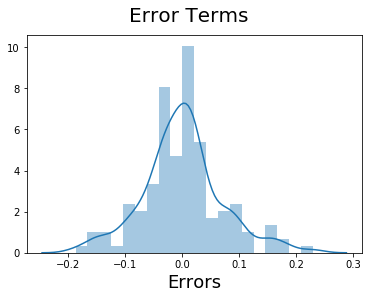

In [36]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

# Step 3 : Making Predictions on built model

## 1. Scaling the test data features


In [37]:
# Data scaling for test set
# Use only transform as initially fit_transform was used which had fit the mean and std.deviation parameters already
car_price_test[vars_to_scale]= scaler.transform(car_price_test[vars_to_scale])


## 2. Splitting data in y_test and x_test

In [38]:
# Price is the dependant variable
y_test = car_price_test.pop('price')

# All independant variables (features) go here
x_test = car_price_test

## 3. Extract the features similar to the X_train on which final model is trained

In [39]:
# Creating X_test_new dataframe by dropping variables from X_test
# X_train_11 is the final dataset on which the model is built
x_test_new = x_test[x_train_11.columns]

# Adding a constant variable 
x_test_lm_new = sm.add_constant(x_test_new)

## 4. Making Predictions

In [40]:
# Making predictions
# lm_11 is the model on which predictions are made
y_pred = lm_11.predict(x_test_lm_new)

## 5. Comparing the actual y_test and predicted y, for the x_test data 

Text(0, 0.5, 'y_pred')

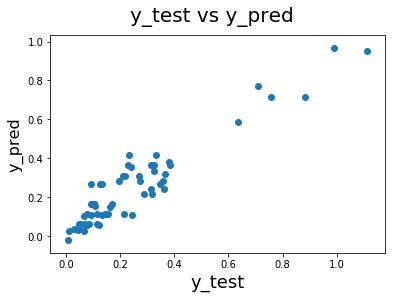

In [41]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

# the graph shows linearity between both y_test and y_pred which tells predictions are similar to actual values

## 6. Accuracy Check

In [42]:
from sklearn.metrics import r2_score
print('r2 score : ',r2_score(y_test, y_pred))

r2 score :  0.8911250520593834


In [43]:
# Accuracy = 0.89 ~ 89%
# which implies the model has predicted the values with 89% of accuracy compared to the actual values